<a href="https://colab.research.google.com/github/LeeTunMT/python/blob/main/DS2024_Lab4_22280083_LeTuanMinhThanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/LeeTunMT/python/main/College.csv')

In [15]:
data


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [18]:
# Delete 2 columns with a string data type
data.drop(columns=data.columns[[0,1]], axis=1,  inplace=True)

In [19]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [20]:
# Explore the dataset to understand its structure, feature types, and basic statistics
print("Dataset structure:")
print(data.info())

print("\nBasic statistics:")
print(data.describe())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB
None

Basic statistics:
 

In [21]:
#check missing values
data.isna().any()*100

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

-> This dataset has no missing values

## Scale the data



In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
X_scl = scaler.transform(data)

In [28]:
X_scl

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

X_scl now is an numpy array. I will snippet converts the numpy array X_scl into a pandas DataFrame X_scl, which then allows you to use the apply method as intended

In [29]:
X_scl = pd.DataFrame(X_scl)

In [30]:
X_scl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


# Implement the KMeans clustering algorithm from scratch using Numpy:

In [ ]:
# Constructing KMeans class
class KMeanSelf:

  def __init__(self, K: int=3, conv_tol: float = 0.02, max_iter: int = 10000):
    # Parameters
    self.K = K
    self.conv_tol = conv_tol
    self.max_iter = max_iter
    # Attributes
    self.cluster_centers_ = None
    self.labels_ = None
    self.n_iters_ = 0
    self.inertia_ = 0

  def __initialize_centroids(self, X):
    ids = np.random.permutation(X.shape[0])
    centroids = X[ids[:self.K]]
    return centroids

  def __update_centroids(self, X  ):
    return np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.K)])

  def __compute_dist_percent(self, prev_centroids):
    dists = []
    for i in range(self.K - 1):
      for j in range(i+1, self.K):
        dists.append(math.dist(self.cluster_centers_[i], self.cluster_centers_[j]))
    self.inertia_ = min(dists)
    return max([math.dist(self.cluster_centers_[i], prev_centroids[i]) for i in range(self.K)]) / self.inertia_

  def fit(self, X):
    # init centroids
    self.cluster_centers_ = self.__initialize_centroids(X)
    prev_centroids = np.zeros((self.K, X.shape[1]))
    # training
    while True:
        # compute distances from X_i to centroids
        distances = distance.cdist(X, self.cluster_centers_) # shape: (N, K)
        # assign new labels
        self.labels_ = np.argmin(distances, axis = 1)
        # check convergence
        if (self.__compute_dist_percent(prev_centroids) <= self.conv_tol) or self.n_iters_ >= self.max_iter:
            break
        prev_centroids = self.cluster_centers_
        self.cluster_centers_ = self.__update_centroids(X)
        # increase iteration count
        self.n_iters_ += 1

  def transform(self, X):
    return np.array([[np.linalg.norm(X[i] - self.cluster_centers_[k]) for k in range(self.K)] for i in range(X.shape[0])])

  def predict(self, X):
    return np.argmin(distance.cdist(X, self.cluster_centers_), axis = 1)

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

  def fit_predict(self, X):
    self.fit(X)
    return self.predict(X)



In [62]:
def ramdom_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis = 1)

In [63]:
centroids = ramdom_centroids(X_scl, 5)

<ipython-input-62-8510c981a814>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [64]:
centroids

,0,1,2,3,4
0,0.024493,0.190990,0.162331,0.041156,0.049528
1,0.023650,0.041092,0.045396,0.051756,0.049052
2,0.019191,0.494101,0.050181,0.296681,0.049866
3,0.147368,0.894737,0.505263,0.073684,0.200000
4,0.769231,0.384615,0.142857,0.593407,0.307692
5,0.206196,0.080752,0.064119,0.208894,0.199086
6,0.468056,0.026242,0.024731,0.001511,0.015938
7,0.390496,0.761364,0.082955,0.405992,0.238120
8,0.435845,0.308953,0.482346,0.280580,0.198298
9,0.224599,0.491979,0.224599,0.269162,0.224599


In [74]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((X_scl - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [78]:
labels = get_labels(X_scl, centroids)

In [79]:
labels.value_counts()

1    628
0    133
2     16
Name: count, dtype: int64

In [80]:
def new_centroids(data, labels, k):
    centroids = X_scl.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [82]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X_scl)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

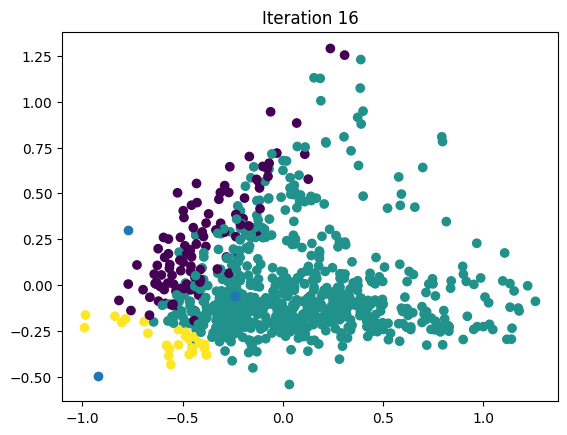

In [86]:
max_iterations = 100
centroid_count = 3

centroids = ramdom_centroids(X_scl, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(X_scl, centroids)
    centroids = new_centroids(X_scl, labels, centroid_count)
    plot_clusters(X_scl, labels, centroids, iteration)
    iteration += 1

# Testing and Validation:

In [87]:
centroids

,0,1,2
0,0.041485,0.000000,0.009896
1,0.058277,0.000000,0.014441
2,0.124476,0.063098,0.000000
3,0.000000,0.000000,0.000000
4,0.312074,0.505917,0.000000
5,0.116774,0.000000,0.020075
6,0.039157,0.000000,0.008210
7,0.000000,0.416211,0.309190
8,0.000000,0.406093,0.316446
9,0.188470,0.000000,0.217726


In [88]:
km = KMeans(3)
km.fit(X_scl)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [89]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [97]:
pd.DataFrame(km.cluster_centers_, columns=data.columns).T

,0,1,2
Apps,0.060683,0.171543,0.025729
Accept,0.066187,0.216526,0.034235
Enroll,0.088793,0.368235,0.056519
Top10perc,0.437703,0.276146,0.174008
Top25perc,0.695734,0.562655,0.376472
F.Undergrad,0.072251,0.392322,0.051730
P.Undergrad,0.014200,0.131434,0.026584
Outstate,0.626731,0.267101,0.326061
Room.Board,0.524636,0.344609,0.346100
Books,0.206282,0.219794,0.193537


## Test my custom KMeans class implementation on the provided dataset.